# University Monthly Expenses

### Import necessary packages

In [1]:
import numpy as np # linear algebra
import pandas as pd # Data processing
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway
import scipy.stats as stats

### Load the file

In [2]:
income_df=pd.read_csv("University Students Monthly Expenses.csv")

In [3]:
income_df.head()

,Gender,Age,Study_year,Living,Scholarship,Part_time_job,Transporting,Smoking,Drinks,Games_&_Hobbies,Cosmetics_&_Self-care,Monthly_Subscription,Monthly_expenses_$
0,Female,21,2.0,Home,No,No,No,No,No,No,Yes,No,150.0
1,Male,25,3.0,Hostel,No,Yes,Motorcycle,No,No,Yes,Yes,Yes,220.0
2,Male,23,2.0,Home,Yes,No,No,No,No,No,No,NaN,180.0
3,Male,19,3.0,Hostel,No,No,Motorcycle,No,No,Yes,Yes,Yes,200.0
4,Female,19,2.0,Home,No,No,Motorcycle,No,No,No,Yes,No,300.0


### Analyze the data

In [4]:
income_df.shape

(105, 13)

In [5]:
income_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 105 non-null    object 
 1   Age                    105 non-null    int64  
 2   Study_year             101 non-null    float64
 3   Living                 103 non-null    object 
 4   Scholarship            105 non-null    object 
 5   Part_time_job          100 non-null    object 
 6   Transporting           91 non-null     object 
 7   Smoking                94 non-null     object 
 8   Drinks                 92 non-null     object 
 9   Games_&_Hobbies        105 non-null    object 
 10  Cosmetics_&_Self-care  92 non-null     object 
 11  Monthly_Subscription   96 non-null     object 
 12  Monthly_expenses_$     99 non-null     float64
dtypes: float64(2), int64(1), object(10)
memory usage: 10.8+ KB


In [6]:
income_df.isna().sum()

Gender                    0
Age                       0
Study_year                4
Living                    2
Scholarship               0
Part_time_job             5
Transporting             14
Smoking                  11
Drinks                   13
Games_&_Hobbies           0
Cosmetics_&_Self-care    13
Monthly_Subscription      9
Monthly_expenses_$        6
dtype: int64

### Taking care of null values

#### Impute missing values for categorical variables with mode

In [7]:
categorical_cols = ['Study_year', 'Living', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Cosmetics_&_Self-care', 'Monthly_Subscription']
for col in categorical_cols:
    mode_value = income_df[col].mode()[0]
    income_df[col].fillna(mode_value, inplace=True)

#### Impute missing values for numerical variables with median

In [8]:
numerical_cols = ['Monthly_expenses_$']
for col in numerical_cols:
    median_value = income_df[col].median()
    income_df[col].fillna(median_value, inplace=True)

In [9]:
income_df.isna().sum()

Gender                   0
Age                      0
Study_year               0
Living                   0
Scholarship              0
Part_time_job            0
Transporting             0
Smoking                  0
Drinks                   0
Games_&_Hobbies          0
Cosmetics_&_Self-care    0
Monthly_Subscription     0
Monthly_expenses_$       0
dtype: int64

### Mean, Mode & Median of everyone's expense

#### Mean

In [10]:
income_df['Monthly_expenses_$'].mean()

214.0952380952381

#### Mode

In [11]:
income_df['Monthly_expenses_$'].mode()

0    200.0
dtype: float64

#### Median

In [12]:
income_df['Monthly_expenses_$'].median()

200.0

### Expenses based on gender

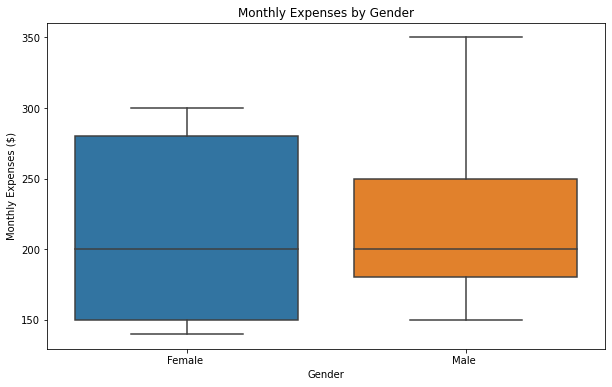

In [13]:
group_column = 'Gender'

plt.figure(figsize=(10, 6))
sns.boxplot(x=group_column, y='Monthly_expenses_$', data=income_df)
plt.title('Monthly Expenses by {}'.format(group_column))
plt.xlabel(group_column)
plt.ylabel('Monthly Expenses ($)')
plt.show()

### Regression Analysis of Age & Study Year with Expense

In [14]:
# Assuming X contains independent variables and y contains dependent variable (monthly expenses)
X = income_df[['Age', 'Study_year']]
y = income_df['Monthly_expenses_$']

# Convert data types to numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Drop rows with missing or infinite values
X.dropna(inplace=True)
y = y[X.index]  # Adjust y accordingly

# Add intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print summary statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     Monthly_expenses_$   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.845
Date:                Fri, 15 Mar 2024   Prob (F-statistic):            0.00977
Time:                        11:53:35   Log-Likelihood:                -571.91
No. Observations:                 105   AIC:                             1150.
Df Residuals:                     102   BIC:                             1158.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.2488     73.480      1.786      0.0

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


From the regression analysis, it can be deduced that neither age nor study year significantly predicts monthly expenses, as indicated by the low R-squared value ***(0.087)*** and the non-significant p-values for both Age **(0.603)** and Study_year **(0.095)**.

### Analysis of Variance (ANOVA) Test to check if there is significant difference in expenses between smokers and non- smokers 

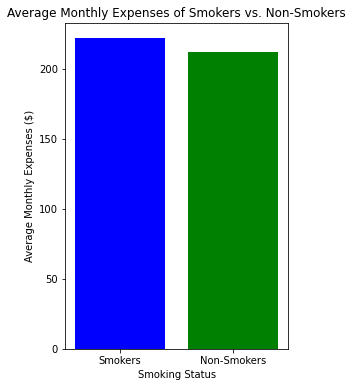

ANOVA results:
F-statistic: 0.47404099316009446
P-value: 0.4926818252254691
Fail to reject null hypothesis: There is no significant difference in expenses between smokers and non-smokers.


In [15]:
# Separate the expenses of smokers and non-smokers
expenses_smokers = income_df[income_df['Smoking'] == 'Yes']['Monthly_expenses_$']
expenses_non_smokers = income_df[income_df['Smoking'] == 'No']['Monthly_expenses_$']

# Perform ANOVA test
f_statistic, p_value = f_oneway(expenses_smokers, expenses_non_smokers)

# Create a bar plot
plt.figure(figsize=(4, 6))
plt.bar(['Smokers', 'Non-Smokers'], [expenses_smokers.mean(), expenses_non_smokers.mean()], color=['blue', 'green'])
plt.xlabel('Smoking Status')
plt.ylabel('Average Monthly Expenses ($)')
plt.title('Average Monthly Expenses of Smokers vs. Non-Smokers')
plt.show()

# Print the results
print("ANOVA results:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in expenses between smokers and non-smokers.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in expenses between smokers and non-smokers.")

### Independant samples t-test on Living condition to check if there is significant difference between their mean

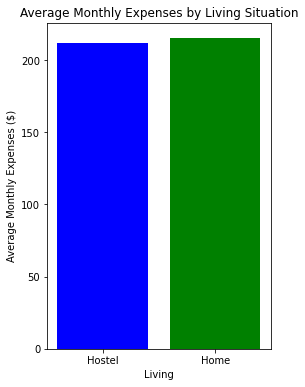

T-statistic: 0.2860610949237988
P-value: 0.7755311933954077
Fail to reject the null hypothesis: There is no significant difference in average monthly expenses between different living situations.


In [16]:
# Separate the data into two groups based on the living situation
expenses_home = income_df[income_df['Living'] == 'Home']['Monthly_expenses_$']
expenses_hostel = income_df[income_df['Living'] == 'Hostel']['Monthly_expenses_$']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(expenses_home, expenses_hostel, equal_var=False)

# Create a bar graph
plt.figure(figsize=(4, 6))
plt.bar(['Hostel', 'Home'], [expenses_hostel.mean(), expenses_home.mean()], color=['blue', 'green'])
plt.xlabel('Living')
plt.ylabel('Average Monthly Expenses ($)')
plt.title('Average Monthly Expenses by Living Situation')
plt.show()

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average monthly expenses between different living situations.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average monthly expenses between different living situations.")

### Expense Distribution by Categorical Groups

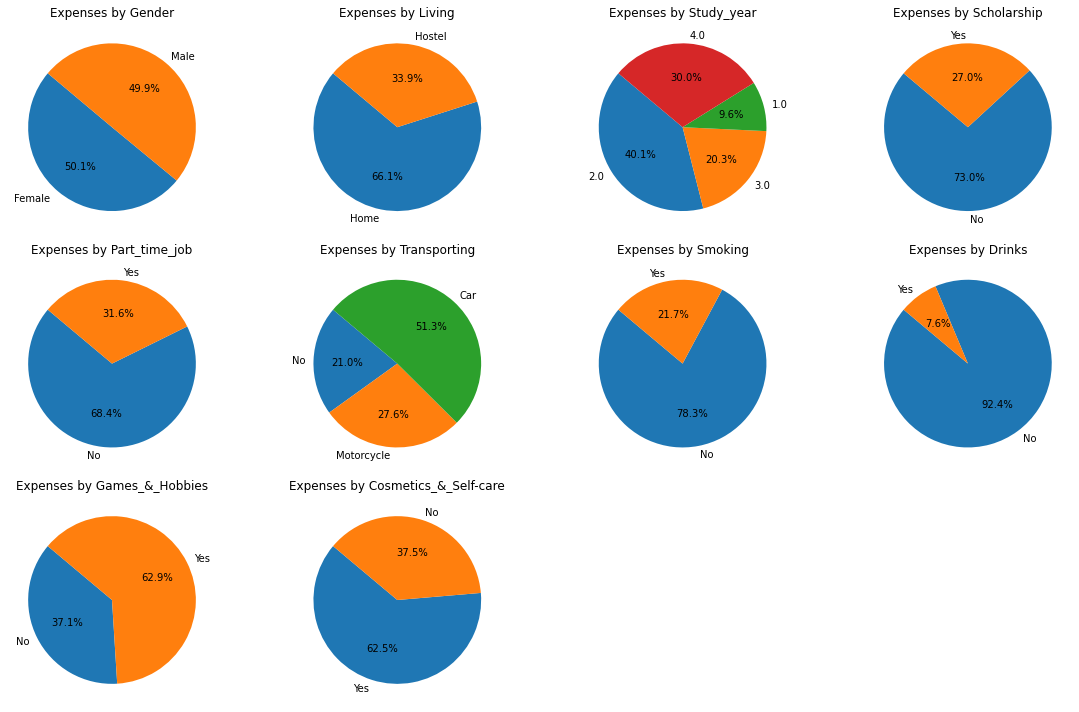

In [17]:
# List of categorical columns containing object values
categorical_cols = ['Gender', 'Living', 'Study_year', 'Scholarship', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care']

# Initialize an empty dictionary to store total expenses for each category
category_expenses = {}

# Calculate total expenses for each category in categorical columns
for col in categorical_cols:
    categories = income_df[col].unique()
    for category in categories:
        total_expenses = income_df[income_df[col] == category]['Monthly_expenses_$'].sum()
        category_expenses[(col, category)] = total_expenses

# Plotting pie charts for each categorical column
plt.figure(figsize=(16, 10))
num_plots = len(categorical_cols)
rows = 3
cols = (num_plots + 2) // 3

for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(rows, cols, i)
    categories = income_df[col].unique()
    expenses = [category_expenses.get((col, category), 0) for category in categories]
    plt.pie(expenses, labels=categories, autopct='%1.1f%%', startangle=140)
    plt.title(f'Expenses by {col}')

plt.tight_layout()
plt.show()

### Camparision of expense of smoker, drinker and gamer with people who are not

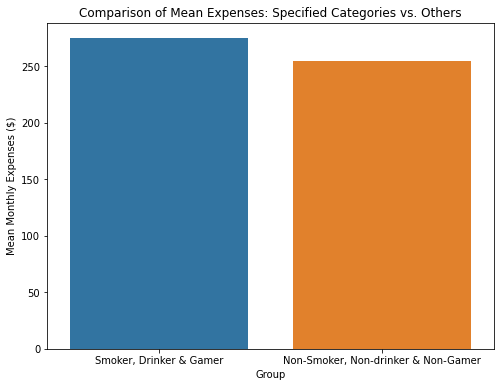

In [18]:
# Filter data for individuals with specified categories
category_group = income_df[(income_df['Smoking'] == 'Yes') &
                           (income_df['Drinks'] == 'Yes') &
                           (income_df['Games_&_Hobbies'] == 'Yes')]

other_group = income_df[(income_df['Smoking'] == 'No') &
                           (income_df['Drinks'] == 'No') &
                           (income_df['Games_&_Hobbies'] == 'No')]

# Calculate summary statistics
category_group_expenses = category_group['Monthly_expenses_$']
other_group_expenses = other_group['Monthly_expenses_$']

category_group_mean = category_group_expenses.mean()
other_group_mean = other_group_expenses.mean()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Smoker, Drinker & Gamer', 'Non-Smoker, Non-drinker & Non-Gamer'], y=[category_group_mean, other_group_mean])
plt.title('Comparison of Mean Expenses: Specified Categories vs. Others')
plt.xlabel('Group')
plt.ylabel('Mean Monthly Expenses ($)')
plt.show()

### Kernel Density Estimation Plot of Monthly Expenses

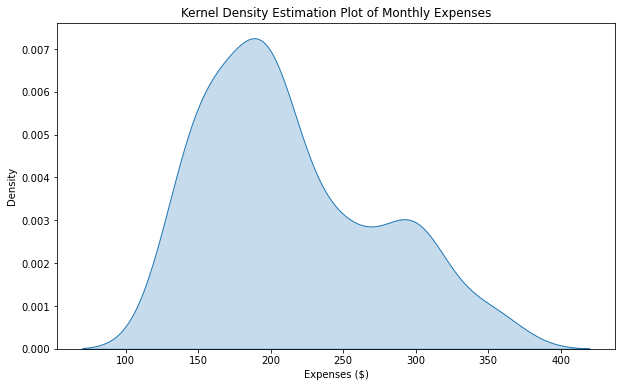

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a KDE plot for Monthly expenses
plt.figure(figsize=(10, 6))
sns.kdeplot(income_df['Monthly_expenses_$'], shade=True)
plt.title('Kernel Density Estimation Plot of Monthly Expenses')
plt.xlabel('Expenses ($)')
plt.ylabel('Density')
plt.show()


The Kernel Density Estimation (KDE) Plot of monthly expenses reveals several insights:

1. **Common Expense Range:** The most frequent range of monthly expenses lies between \\$200 and \\$250. This peak indicates that many individuals have expenses within this bracket.
2. **Secondary Peaks:** There are smaller peaks around \\$100 and just over \\$300, suggesting that these amounts are also common but less frequent than the \\$200 - \\$250 range.
3. **Skewed Distribution:** The KDE plot is skewed to the right, indicating that higher expenses are less common.
4. **Outliers:** The long tail on the right side suggests that some individuals have significantly higher expenses, possibly due to specific circumstances or outliers.


### Scatter Plot of Monthly Expenses

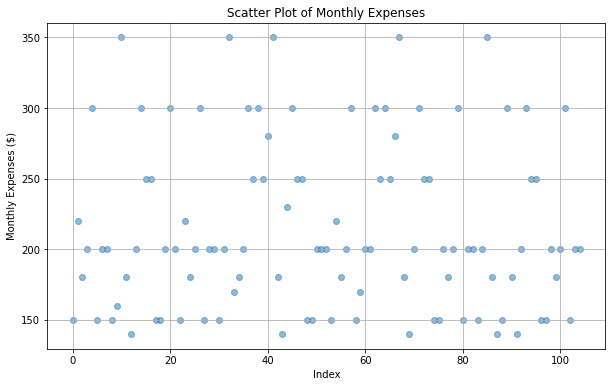

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(income_df)), income_df['Monthly_expenses_$'], alpha=0.5)
plt.title('Scatter Plot of Monthly Expenses')
plt.xlabel('Index')
plt.ylabel('Monthly Expenses ($)')
plt.grid(True)
plt.show()

From the Scatter Plot of Monthly Expenses for university students, we can infer the following:

1. **Variability:** The data points are scattered across the plot, indicating diverse monthly expenses among students.
2. **No Clear Trend:** There is no discernible pattern or linear relationship between the index (x-axis) and monthly expenses (y-axis).
3. **Concentration:** Most data points cluster between \\$200 and \\$300 in monthly expenses, suggesting this range is common.
4. **Outliers:** A few data points extend beyond this cluster, representing higher or lower expenses compared to the majority.